In [6]:
import os

In [7]:
for pe in range(10,100,5):
    os.system("python3 main_traj.py --periods {}".format(pe))

In [55]:
import matplotlib.pyplot as plt 
from misc import *
import tensorflow as tf
from tqdm import tqdm
import os 
from RNN_models import *


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from misc import load_data, get_def_path

periods = 10
ppp=1000
train_id = 0
defpath = get_def_path()
path = defpath+"{}periods/{}ppp/".format(periods,ppp)


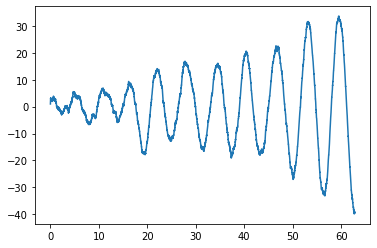

In [57]:
means, covs, signals, coeffs = load_data(path)
tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]
A,dt,C,D = coeffs
times = np.linspace(0,periods*2*np.pi, periods*ppp+1)
total_time = times[-1]
plt.plot(times, means[:,0])

In [59]:
rmodel = GRNNmodel(coeffs = [C,D,dt, total_time], traj_details=[periods, ppp, train_id, path], cov_in=tf.convert_to_tensor(covs[0].astype(np.float32)), stateful=False)
rmodel.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01))
rmodel.recurrent_layer(tfsignals[:,:10,:], initial_state=rmodel.initial_state)
#rmodel.trainable_variables[0].assign(tf.convert_to_tensor(A.astype(np.float32)))


<tf.Tensor: shape=(1, 10, 2), dtype=float32, numpy=
array([[[ 0.01256637,  0.        ],
        [ 0.01382301, -0.00125664],
        [ 0.01256637, -0.00251327],
        [ 0.01382301, -0.00376991],
        [ 0.01507965, -0.00502655],
        [ 0.01633628, -0.00628319],
        [ 0.01759292, -0.00753982],
        [ 0.01731217, -0.00879646],
        [ 0.01856881, -0.0100531 ],
        [ 0.01893105, -0.01130973]]], dtype=float32)>

In [60]:
history = rmodel.fit(x=tfsignals, y=tfsignals, 
                     epochs = 10**2, callbacks = [CustomCallback(),
                                                  tf.keras.callbacks.EarlyStopping(monitor='total_loss', 
                                                                                   min_delta=0, patience=500,
                                                                                   verbose=0,
                                                                                   mode='min')])



Epoch 1/100
1/1 [==============================] - 0s 1ms/step - total_loss: 3.3364 - Coeffs_A: 0.0143 - grads: 0.2196
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - total_loss: 3.3242 - Coeffs_A: 0.0093 - grads: 0.2178
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - total_loss: 3.3120 - Coeffs_A: 0.0043 - grads: 0.2163
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - total_loss: 3.2999 - Coeffs_A: -6.7705e-04 - grads: 0.2130
Epoch 5/100


KeyboardInterrupt: 

In [61]:
rmodel.trainable_variables

[<tf.Variable 'rnn_7/stacked_rnn_cells_7/rcell_7/kernel:0' shape=(2, 2) dtype=float32, numpy=
 array([[-0.02429596,  0.05195865],
        [-0.00891337, -0.0414007 ]], dtype=float32)>]

In [31]:
histories = rmodel.history.history
#keys_histories = list(histories.keys())
#for k,v, in histories.items():
 #   np.save(train_path+"{}".format(k), v, allow_pickle=True)


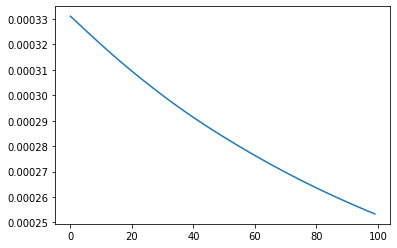

In [17]:
plt.plot(history.history["total_loss"])